In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max.columns", None)
df = pd.read_csv('./data/runtime_200steps_with_ids.csv')

In [3]:
df.head(20)

,ID,NumberOfIntegers,DataStructure,insert(),insertAt(),contains(),indexOf(),get(),delete()
0,0,100000,ArrayList,6.75,10.76,3.08,3.13,0.11,10.86
1,1,100000,ArrayList_Initialized,2.94,5.23,0.28,0.26,0.07,5.09
2,2,100000,LinkedList,8.39,1.57,2.80,0.84,1.50,0.17
3,3,100000,Vector,7.39,10.81,2.67,3.13,0.16,14.04
4,4,100000,Vector_Initialized,2.96,5.18,0.27,0.26,0.07,5.10
5,5,150000,ArrayList,5.44,12.70,0.62,0.62,0.12,12.77
6,6,150000,ArrayList_Initialized,4.16,12.73,0.61,0.60,0.12,12.76
7,7,150000,LinkedList,8.57,1.50,2.13,2.12,1.45,0.11
8,8,150000,Vector,4.90,11.94,1.00,0.73,0.15,11.99
9,9,150000,Vector_Initialized,1.74,12.37,0.54,0.57,0.10,11.47


### Grouping the values by NumberOfIntegers

In [4]:
g = df.groupby('NumberOfIntegers')
# g.apply(lambda x: x).head(10)
g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)).head(10)

ID  NumberOfIntegers          DataStructure  insert()  \
NumberOfIntegers                                                            
100000           0   1            100000  ArrayList_Initialized      2.94   
                 1   3            100000                 Vector      7.39   
                 2   0            100000              ArrayList      6.75   
                 3   2            100000             LinkedList      8.39   
                 4   4            100000     Vector_Initialized      2.96   
150000           0   7            150000             LinkedList      8.57   
                 1   9            150000     Vector_Initialized      1.74   
                 2   5            150000              ArrayList      5.44   
                 3   8            150000                 Vector      4.90   
                 4   6            150000  ArrayList_Initialized      4.16   

                    insertAt()  contains()  indexOf()  get()  delete()  
NumberOfIntegers                                                        
100000           0        5.23        0.28       0.26   0.07      5.09  
                 1       10.81        2.67       3.13   0.16     14.04  
                 2       10.76        3.08       3.13   0.11     10.86  
                 3        1.57        2.80       0.84   1.50      0.17  
                 4        5.18        0.27       0.26   0.07      5.10  
150000           0        1.50        2.13       2.12   1.45      0.11  
                 1       12.37        0.54       0.57   0.10     11.47  
                 2       12.70        0.62       0.62   0.12     12.77  
                 3       11.94        1.00       0.73   0.15     11.99  
                 4       12.73        0.61       0.60   0.12     12.76

### Taking the minmum value of the insert() column of each group

In [5]:
df.groupby('NumberOfIntegers')['insert()'].min()

NumberOfIntegers
100000       2.94
150000       1.74
200000       2.13
250000       1.72
300000       4.32
            ...  
9850000     19.44
9900000      8.42
9950000     13.09
10000000    11.57
10050000     6.86
Name: insert(), Length: 200, dtype: float64

### Viewing the entire rows of above values

We need to take the minimum value of each column separately for each group, and consider it as the best data structure for that number of insert values. For example, below, we have considered the insert() column, and taken the minimum run-time for each group. The data structure that values belongs is the best data structure for that particular group in terms of insert() operation.

In [6]:
df.loc[df.groupby('NumberOfIntegers')['insert()'].idxmin()][['ID', 'DataStructure', 'insert()']]

,ID,DataStructure,insert()
1,1,ArrayList_Initialized,2.94
9,9,Vector_Initialized,1.74
12,12,LinkedList,2.13
19,19,Vector_Initialized,1.72
21,21,ArrayList_Initialized,4.32
...,...,...,...
976,976,ArrayList_Initialized,19.44
981,981,ArrayList_Initialized,8.42
987,987,LinkedList,13.09
991,991,ArrayList_Initialized,11.57


### Method that returns individual grouped dfs with min value of the relevant column

In [7]:
def get_min_dfs():
    cols = ['insert()', 'insertAt()', 'contains()', 'indexOf()', 'get()', 'delete()']
    return [df.loc[df.groupby('NumberOfIntegers')[col].idxmin()][['ID', 'NumberOfIntegers', 'DataStructure', col]] for col in cols]

In [8]:
min_dfs = get_min_dfs()
min_dfs[0:2]

[      ID  NumberOfIntegers          DataStructure  insert()
 1      1            100000  ArrayList_Initialized      2.94
 9      9            150000     Vector_Initialized      1.74
 12    12            200000             LinkedList      2.13
 19    19            250000     Vector_Initialized      1.72
 21    21            300000  ArrayList_Initialized      4.32
 ..   ...               ...                    ...       ...
 976  976           9850000  ArrayList_Initialized     19.44
 981  981           9900000  ArrayList_Initialized      8.42
 987  987           9950000             LinkedList     13.09
 991  991          10000000  ArrayList_Initialized     11.57
 997  997          10050000             LinkedList      6.86
 
 [200 rows x 4 columns],
       ID  NumberOfIntegers DataStructure  insertAt()
 2      2            100000    LinkedList        1.57
 7      7            150000    LinkedList        1.50
 12    12            200000    LinkedList        2.31
 17    17            2500

### Adding a new 'recommended' column

In [9]:
# Trying out the method with a sample. Here, 'new_col' is the recommended col.
col_arr = min_dfs[0]['DataStructure'].to_numpy()
min_dfs[0].loc[min_dfs[0].groupby('NumberOfIntegers').cumcount().eq(0), 'new_col'] = col_arr
min_dfs[0]

,ID,NumberOfIntegers,DataStructure,insert(),new_col
1,1,100000,ArrayList_Initialized,2.94,ArrayList_Initialized
9,9,150000,Vector_Initialized,1.74,Vector_Initialized
12,12,200000,LinkedList,2.13,LinkedList
19,19,250000,Vector_Initialized,1.72,Vector_Initialized
21,21,300000,ArrayList_Initialized,4.32,ArrayList_Initialized
...,...,...,...,...,...
976,976,9850000,ArrayList_Initialized,19.44,ArrayList_Initialized
981,981,9900000,ArrayList_Initialized,8.42,ArrayList_Initialized
987,987,9950000,LinkedList,13.09,LinkedList
991,991,10000000,ArrayList_Initialized,11.57,ArrayList_Initialized


#### Adding a new recommended column to the original dataset with the recommended data structure

In [10]:
# df[['ID', 'NumberOfIntegers', 'DataStructure', 'insertAt()']]

In [11]:
# First, take the part of the df we want(we consider only the inser() column for now).
df_with_recommended_insert = df[['ID', 'NumberOfIntegers', 'DataStructure', 'insert()']]

# converting the columns to arrays
col_arr = min_dfs[0]['DataStructure'].to_numpy()

# This would add only one value to the new column, and other values will be NaN. 'eq(0)' means the position of where the new value should get added.
df_with_recommended_insert.loc[df_with_recommended_insert.groupby('NumberOfIntegers').cumcount().eq(1), 'ds_insert()'] = col_arr
df_with_recommended_insert

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value


,ID,NumberOfIntegers,DataStructure,insert(),ds_insert()
0,0,100000,ArrayList,6.75,NaN
1,1,100000,ArrayList_Initialized,2.94,ArrayList_Initialized
2,2,100000,LinkedList,8.39,NaN
3,3,100000,Vector,7.39,NaN
4,4,100000,Vector_Initialized,2.96,NaN
...,...,...,...,...,...
995,995,10050000,ArrayList,17.17,NaN
996,996,10050000,ArrayList_Initialized,14.21,LinkedList
997,997,10050000,LinkedList,6.86,NaN
998,998,10050000,Vector,10.05,NaN


Next, consider mapping all the groups(NumberOfIntegers) to their best data structure(here, we have taken the inser() column).

In [12]:
# converting the columns to arrays
num_of_int_arr = min_dfs[0]['NumberOfIntegers'].to_numpy()
col_arr = min_dfs[0]['DataStructure'].to_numpy()

mapping = dict(zip(num_of_int_arr, col_arr))
# mapping

Now, add a new column to save the recommended or the best data structures from each group, and add that value to other rows of each group as well.

In [13]:
# This method of adding new values is the better way. Because it adds the value to every row of each group.
df_with_recommended_insert["ds_insert()"] = df_with_recommended_insert['NumberOfIntegers'].map(mapping)

/tmp/ipykernel_467/1645631983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_recommended_insert["ds_insert()"] = df_with_recommended_insert['NumberOfIntegers'].map(mapping)


Below, we can see that the data structure that has minimum 'insert()' run-time has been added to the every row of each group in a new column.

In [14]:
df_with_recommended_insert

,ID,NumberOfIntegers,DataStructure,insert(),ds_insert()
0,0,100000,ArrayList,6.75,ArrayList_Initialized
1,1,100000,ArrayList_Initialized,2.94,ArrayList_Initialized
2,2,100000,LinkedList,8.39,ArrayList_Initialized
3,3,100000,Vector,7.39,ArrayList_Initialized
4,4,100000,Vector_Initialized,2.96,ArrayList_Initialized
...,...,...,...,...,...
995,995,10050000,ArrayList,17.17,LinkedList
996,996,10050000,ArrayList_Initialized,14.21,LinkedList
997,997,10050000,LinkedList,6.86,LinkedList
998,998,10050000,Vector,10.05,LinkedList


### Do this to all the groups

#### Get dfs split into each function(insert(), insertAt(), etc.)

In [15]:
def get_dfs():
    cols = ['insert()', 'insertAt()', 'contains()', 'indexOf()', 'get()', 'delete()']
    return [df[['ID', 'NumberOfIntegers', 'DataStructure', col]] for col in cols]

In [16]:
split_dfs = get_dfs()
split_dfs[0:2]

[      ID  NumberOfIntegers          DataStructure  insert()
 0      0            100000              ArrayList      6.75
 1      1            100000  ArrayList_Initialized      2.94
 2      2            100000             LinkedList      8.39
 3      3            100000                 Vector      7.39
 4      4            100000     Vector_Initialized      2.96
 ..   ...               ...                    ...       ...
 995  995          10050000              ArrayList     17.17
 996  996          10050000  ArrayList_Initialized     14.21
 997  997          10050000             LinkedList      6.86
 998  998          10050000                 Vector     10.05
 999  999          10050000     Vector_Initialized      8.65
 
 [1000 rows x 4 columns],
       ID  NumberOfIntegers          DataStructure  insertAt()
 0      0            100000              ArrayList       10.76
 1      1            100000  ArrayList_Initialized        5.23
 2      2            100000             LinkedList 

In [17]:
# mapping = dict(zip(num_of_int_arr, col_arr))
# df_with_recommended_insert["ds_insert()"] = df_with_recommended_insert['NumberOfIntegers'].map(mapping)
# col_arr = min_dfs[0]['DataStructure'].to_numpy()

min_datastructures = [min_df['DataStructure'].to_numpy() for min_df in min_dfs]
mappings = [dict(zip(num_of_int_arr, min_df)) for min_df in min_datastructures]
new_cols = ['ds_insert()', 'ds_insertAt()', 'ds_contains()', 'ds_indexOf()', 'ds_get()', 'ds_delete()']

for index, split_df in enumerate(split_dfs):
    split_df[new_cols[index]] = split_df['NumberOfIntegers'].map(mappings[index])
# processed_dfs = [split_df['NumberOfIntegers'].map(mappings[index]) for index, split_df in enumerate(split_dfs)]

/tmp/ipykernel_467/2356634724.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_df[new_cols[index]] = split_df['NumberOfIntegers'].map(mappings[index])


In [18]:
split_dfs[0:2]

[      ID  NumberOfIntegers          DataStructure  insert()  \
 0      0            100000              ArrayList      6.75   
 1      1            100000  ArrayList_Initialized      2.94   
 2      2            100000             LinkedList      8.39   
 3      3            100000                 Vector      7.39   
 4      4            100000     Vector_Initialized      2.96   
 ..   ...               ...                    ...       ...   
 995  995          10050000              ArrayList     17.17   
 996  996          10050000  ArrayList_Initialized     14.21   
 997  997          10050000             LinkedList      6.86   
 998  998          10050000                 Vector     10.05   
 999  999          10050000     Vector_Initialized      8.65   
 
                ds_insert()  
 0    ArrayList_Initialized  
 1    ArrayList_Initialized  
 2    ArrayList_Initialized  
 3    ArrayList_Initialized  
 4    ArrayList_Initialized  
 ..                     ...  
 995             Lin

## Classification

### Method to get the trained model info

In [19]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred, average=None))
    print('Recall:\n',metrics.recall_score(y_test, y_pred, average=None))

### split train input and output data

In [20]:
df_insert = split_dfs[0]

# encoding data structures so it can be used as an input parameter
dic = {"ArrayList": 1, "ArrayList_Initialized": 2, "LinkedList": 3, "Vector": 4, "Vector_Initialized": 5}
df_insert = df_insert.replace({"DataStructure": dic})

In [21]:
print(df_insert.shape)

num_of_classes = len(df_insert['ds_insert()'].unique())
print(num_of_classes)

(1000, 5)
5


In [22]:
# split train input and output data
X = df_insert.drop(axis=0, columns=['ID', 'ds_insert()'])
Y = df_insert['ds_insert()']

# Print the shape of X and Y
print(X.shape)
print(Y.shape)

(1000, 3)
(1000,)


In [23]:
X

,NumberOfIntegers,DataStructure,insert()
0,100000,1,6.75
1,100000,2,2.94
2,100000,3,8.39
3,100000,4,7.39
4,100000,5,2.96
...,...,...,...
995,10050000,1,17.17
996,10050000,2,14.21
997,10050000,3,6.86
998,10050000,4,10.05


In [24]:
Y

0      ArrayList_Initialized
1      ArrayList_Initialized
2      ArrayList_Initialized
3      ArrayList_Initialized
4      ArrayList_Initialized
               ...          
995               LinkedList
996               LinkedList
997               LinkedList
998               LinkedList
999               LinkedList
Name: ds_insert(), Length: 1000, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

### Split into training and test sets

In [26]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=65)

## DecisionTreeClassifier from Sklearn

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_sk = DecisionTreeClassifier(criterion="entropy", random_state=65)   
dt_sk.fit(X_train, y_train)

# print(dt_sk)
# print_model_performance(dt_sk, X_test, y_test)

DecisionTreeClassifier(criterion='entropy', random_state=65)

In [28]:
# from sklearn.metrics import classification_report, confusion_matrix

# print(classification_report(y_test, dt_classifier.predict(X_test)))
# print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Predicting

In [29]:
val = dt_sk.predict(X_test)

output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
output.head(20)

,Expected Output,Predicted Output
662,Vector_Initialized,Vector
414,ArrayList,ArrayList
707,ArrayList_Initialized,ArrayList_Initialized
280,ArrayList_Initialized,ArrayList_Initialized
609,LinkedList,ArrayList_Initialized
449,LinkedList,LinkedList
855,LinkedList,LinkedList
908,Vector_Initialized,LinkedList
110,LinkedList,LinkedList
776,LinkedList,LinkedList


## xgboost

In [91]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [96]:
from xgboost import XGBClassifier

# Create a classifier
xgb_a = XGBClassifier(
                          booster='gbtree', 
                          objective='multi:softprob', 
                          random_state=2, 
                          eval_metric="auc", 
                          num_class=num_of_classes,
                          # n_estimators=50000
                      )

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier with the training data
xgb_a.fit(X_train, y_train, eval_metric=['merror','mlogloss'], eval_set=evalset, verbose=False)

print_model_performance(xgb_a, X_test, y_test)

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score:
 0.803030303030303
Confusion matrix:
 [[  5   2   4   0   1]
 [  1  91  15   1   4]
 [  0  14 139   1   1]
 [  0   9   2   7   2]
 [  0   4   3   1  23]]
Classification report:
                        precision    recall  f1-score   support

            ArrayList     0.8333    0.4167    0.5556        12
ArrayList_Initialized     0.7583    0.8125    0.7845       112
           LinkedList     0.8528    0.8968    0.8742       155
               Vector     0.7000    0.3500    0.4667        20
   Vector_Initialized     0.7419    0.7419    0.7419        31

             accuracy                         0.8030       330
            macro avg     0.7773    0.6436    0.6846       330
         weighted avg     0.8003    0.8030    0.7950       330

Precision:
 [0.83333333 0.75833333 0.85276074 0.7        0.74193548]
Recall:
 [0.41666667 0.8125     0.89677419 0.35       0.74193548]


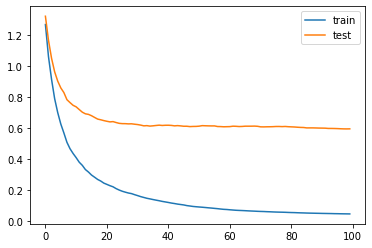

In [97]:
# retrieve performance metrics
results = xgb_a.evals_result()

# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

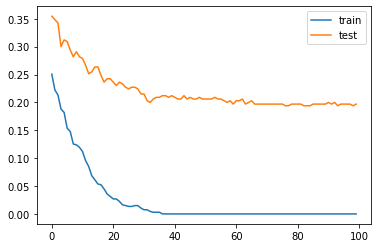

In [99]:
# retrieve performance metrics
results = xgb_a.evals_result()

# plot learning curves
plt.plot(results['validation_0']['merror'], label='train')
plt.plot(results['validation_1']['merror'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

# Use trained model to predict output of test dataset
val = xgb_a.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

0.7908128037721687

In [101]:
# proba_single = xgb_a.predict([[1005020, 2.94]])
row = pd.DataFrame(X_test.iloc[1]).T
row['NumberOfIntegers'] = 100000
row['DataStructure'] = 4
row['insert()'] = 1.94
proba_single = xgb_a.predict(row)
proba_single

array(['Vector_Initialized'], dtype=object)

In [37]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
output.head(20)

,Expected Output,Predicted Output
662,Vector_Initialized,Vector_Initialized
414,ArrayList,ArrayList
707,ArrayList_Initialized,ArrayList_Initialized
280,ArrayList_Initialized,ArrayList_Initialized
609,LinkedList,ArrayList_Initialized
449,LinkedList,LinkedList
855,LinkedList,LinkedList
908,Vector_Initialized,Vector_Initialized
110,LinkedList,LinkedList
776,LinkedList,LinkedList


------

## Considering a set of models to evaluate the accuracy of each model

In [38]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)

In [39]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=65)

#### XGBClassifier

In [56]:
xgb_b = XGBClassifier(n_estimators=50000,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    n_jobs=6,
                    random_state=65)

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier with the training data
xgb_b.fit(X_train, y_train, eval_metric=['merror','mlogloss'], eval_set=evalset, verbose=False)

print_model_performance(xgb_b, X_test, y_test)

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:37] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy score:
 0.8818181818181818
Confusion matrix:
 [[  9   0   0   0   0]
 [  0  99   9   3   0]
 [  0   5 153   0   1]
 [  0   2   1   5   3]
 [  0   6   9   0  25]]
Classification report:
                        precision    recall  f1-score   support

            ArrayList     1.0000    1.0000    1.0000         9
ArrayList_Initialized     0.8839    0.8919    0.8879       111
           LinkedList     0.8895    0.9623    0.9245       159
               Vector     0.6250    0.4545    0.5263        11
   Vector_Initialized     0.8621    0.6250    0.7246        40

             accuracy                         0.8818       

In [41]:
# Saving the model
# xgb_b.save_model('xgb_b.bst')

In [42]:
# Loading the model
# loaded_model_xgb_b = XGBClassifier()
# loaded_model_xgb_b.load_model("xgb_b.txt")

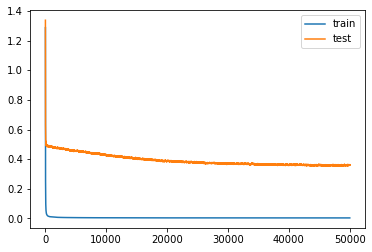

In [57]:
# retrieve performance metrics
results = xgb_b.evals_result()

# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

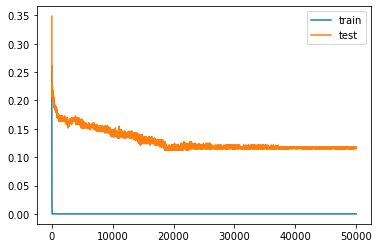

In [45]:
# retrieve performance metrics
results = xgb_b.evals_result()

# plot learning curves
plt.plot(results['validation_0']['merror'], label='train')
plt.plot(results['validation_1']['merror'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [46]:
row = pd.DataFrame(X_test.iloc[1]).T
row['NumberOfIntegers'] = 100000
row['DataStructure'] = 1
row['insert()'] = 2.94

single = xgb_b.predict(row)
proba_single = xgb_b.predict_proba(row)

print(proba_single)
print(single)

[[4.9165341e-05 8.3732271e-01 1.3091055e-02 3.8913207e-05 1.4949813e-01]]
['ArrayList_Initialized']


#### LGBMClassifier

In [47]:
lgbm = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=55)

# Fit the classifier with the training data
# lgbm.fit(X_train, y_train)

# print_model_performance(lgbm, X_test, y_test)

#### GradientBoostingClassifier

In [48]:
gbm = GradientBoostingClassifier(n_estimators=2000,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=1234)

# Fit the classifier with the training data
# gbm.fit(X_train, y_train)

# print_model_performance(gbm, X_test, y_test)

#### AdaBoostClassifier

In [49]:
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)
ab = AdaBoostClassifier(base_estimator=base_estim,
                        n_estimators=500,
                        learning_rate=0.5,
                        random_state=1234)

# Fit the classifier with the training data
# ab.fit(X_train, y_train)

# print_model_performance(ab, X_test, y_test)

#### RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=2000,
                            max_features=0.06,
                            n_jobs=6,
                            random_state=1234)

# Fit the classifier with the training data
# rf.fit(X_train, y_train)

# print_model_performance(rf, X_test, y_test)

#### DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier(max_depth=12, random_state=1234)

# Fit the classifier with the training data
# dt.fit(X_train, y_train)

# print_model_performance(dt, X_test, y_test)

### Evaluating the resutls

In [52]:
# Setting up our results dataframe
df_results = pd.DataFrame(columns=['accuracy'])
# df_results = pd.pivot_table(df_results, index=['name'], values=['accuracy'],aggfunc='sum')

models = [dt, rf, ab, gbm, xgb_a, xgb_b]
model_names = [i.__class__.__name__ for i in models]
es_models = ['XGBClassifier']

for m, n in zip(models, model_names):
    
#     if n in es_models:
#         m.fit(X_train,
#               y_train,
#               eval_set = [(X_test, y_test)],
#               early_stopping_rounds=15,
#               verbose=0
#              )
#     else:
#         m.fit(X_train, y_train)

    m.fit(X_train, y_train)
        
    accuracy = np.mean(m.predict(X_test) == y_test)
        
    df_results.loc[n] = [accuracy]
    
    del m

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:40] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:57:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
df_results

,accuracy
DecisionTreeClassifier,0.663636
RandomForestClassifier,0.642424
AdaBoostClassifier,0.393939
GradientBoostingClassifier,0.715152
XGBClassifier,0.881818
